# Pyber Data Analysis

#### Observations:

* Rural cities have the highest number of total rides and driver counts, followed by suburban cities, then rural cities. The amount of drivers positively correlates to the number of rides, and perhaps, demands for rides.

* There is an inverse relationship between the amount of shared rides taken place (including number of rides and number of drivers) and the average fare. On average, shared rides cost more in rural cities than in suburban and urban cities.

* The variability of total number of rides per city is largest in urban cities and smallest in rural cities. Perhaps due to the larger dataset obtained by urban cities. However, the variability of average fare is largest in rural cities.

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [2]:
# Combine the data into a single dataset
pyber = pd.merge(city_data, ride_data, how ="outer", on = "city")

# Display the data table for preview
pyber.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
#DF for city types
urban_df = pyber.loc[pyber["type"]=="Urban",:]
suburban_df = pyber.loc[pyber["type"]=="Suburban",:]
rural_df = pyber.loc[pyber["type"]=="Rural",:]

## Bubble Plot of Ride Sharing Data

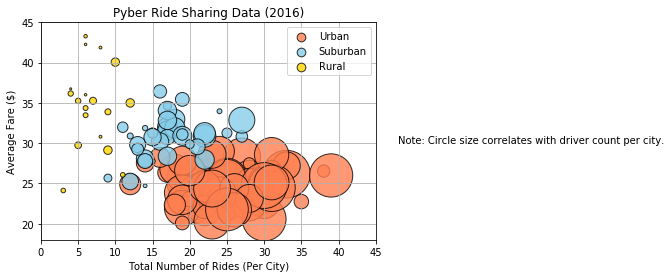

In [15]:
## Obtain the x and y coordinates for each of the three city types
urban_x = urban_df.groupby("city")["ride_id"].count()
urban_y = urban_df.groupby("city")["fare"].mean()
urban_drivercount = urban_df.groupby("city")["driver_count"].sum()

suburban_x = suburban_df.groupby("city")["ride_id"].count()
suburban_y = suburban_df.groupby("city")["fare"].mean()
suburban_drivercount = suburban_df.groupby("city")["driver_count"].sum()

rural_x = rural_df.groupby("city")["ride_id"].count()
rural_y = rural_df.groupby("city")["fare"].mean()
rural_drivercount = rural_df.groupby("city")["driver_count"].sum()

# Build the scatter plots for each city types
urban = plt.scatter(urban_x, urban_y, marker="o", c='coral', s=urban_drivercount, edgecolors = 'black', linewidths=1, alpha=0.8)
suburban = plt.scatter(suburban_x, suburban_y, marker="o", c='skyblue', s=suburban_drivercount, edgecolors = 'black', linewidths=1, alpha=0.8)
rural = plt.scatter(rural_x, rural_y, marker="o", c='gold', s=rural_drivercount, edgecolors = 'black',linewidths=1 , alpha=0.8)

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")

plt.xlim(0, 45)
plt.ylim(18, 45)
plt.grid()

# Create a legend
legend = plt.legend((urban, suburban, rural), ("Urban", "Suburban", "Rural"),loc ='best')
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]

# Incorporate a text label regarding circle size
text = "Note: Circle size correlates with driver count per city."
plt.text(48, 30, text)

# Save Figure
plt.savefig("Pyber Sharing Data.png")
plt.show()

## Total Fares by City Type

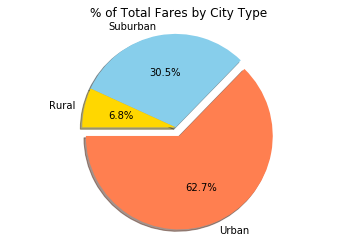

In [5]:
# Percent of total fares by city type
totfare = pyber["fare"].sum()

percent_urban = (urban_df["fare"].sum()/totfare)*100
percent_suburban = (suburban_df["fare"].sum()/totfare)*100
percent_rural = (rural_df["fare"].sum()/totfare)*100

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
value = [percent_urban, percent_suburban, percent_rural]
colors = ["coral", "skyblue", "gold"]
explode = [0.1,0,0]

plt.pie(value, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%",shadow=True, startangle = 180)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Fare Distribution by City Type.png")
plt.show()

## Total Rides by City Type

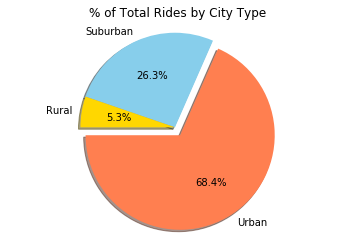

In [9]:
# Calculate Ride Percents
totrides = pyber["ride_id"].count()
ride_urban=(urban_df["ride_id"].count()/totrides)*100
ride_suburban=(suburban_df["ride_id"].count()/totrides)*100
ride_rural=(rural_df["ride_id"].count()/totrides)*100

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
value = [ride_urban, ride_suburban, ride_rural]
colors = ["coral", "skyblue", "gold"]
explode = [0.1,0,0]

plt.pie(value, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%",shadow=True, startangle = 180)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Rides Distribution by City Type.png")
plt.show()

## Total Drivers by City Type

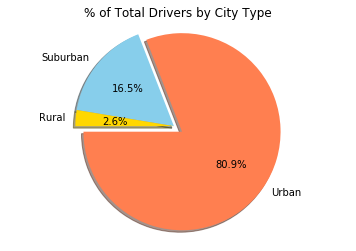

In [7]:
# Calculate Driver Percents
urbancity=urban_df.drop_duplicates(["city"])
urban_drivers = urbancity["driver_count"].sum()

suburbancity=suburban_df.drop_duplicates(["city"])
suburban_drivers = suburbancity["driver_count"].sum()

ruralcity=rural_df.drop_duplicates(["city"])
rural_drivers = ruralcity["driver_count"].sum()

total_drivers = urban_drivers+suburban_drivers+rural_drivers

precent_urban_drivers = (urban_drivers/total_drivers)*100
percent_suburban_drivers = (suburban_drivers/total_drivers)*100
percent_rural_drivers = (rural_drivers/total_drivers)*100

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
value = [precent_urban_drivers, percent_suburban_drivers, percent_rural_drivers]
colors = ["coral", "skyblue", "gold"]
explode = [0.1,0,0]

plt.pie(value, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%",shadow=True, startangle = 180)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Driver Distribution by City Type.png")
plt.show()